In [13]:
import numpy as np
from PIL import Image
import colorsys
import matplotlib.pyplot as plt
import time

In [14]:
def mandlebrot(c):
    z = 0 
    iterations = 100
    cSpace = np.linspace(-2, 2, 20)
    plotarray = np.array([],[])

    for c in cSpace: 
        for i in iterations:
            y = z**2 + cSpace[c]
            z = y
            plotarray.append([y,c])
        


    return 


#### Exercise 1

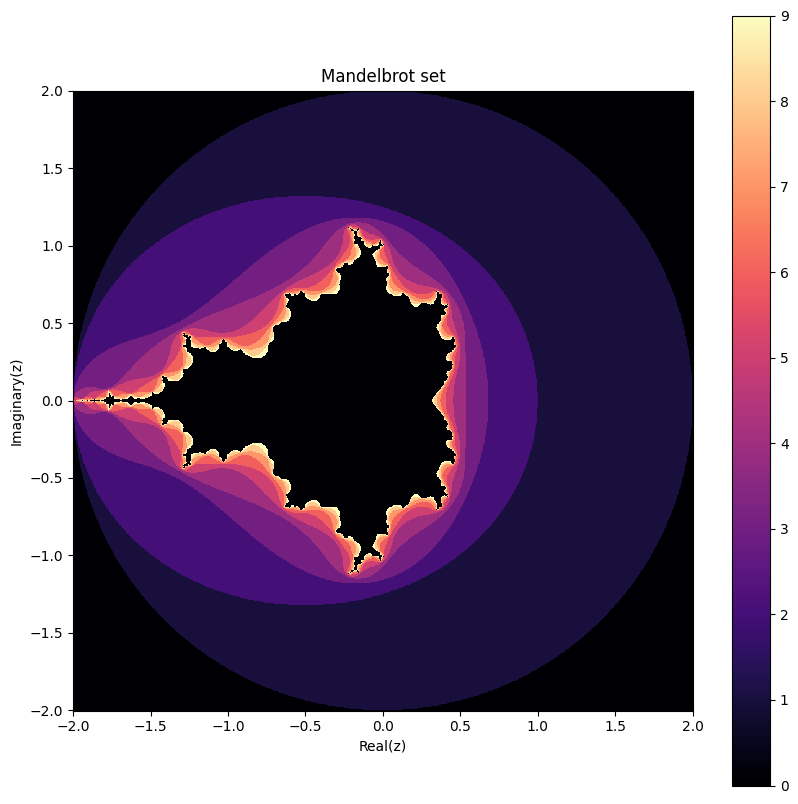

In [15]:
# Mandelbrot sequence
def recursive_z(n, c):
    if n == 0:
        return 0
    else:
        return recursive_z(n - 1, c)**2 + c

  
# Checking if a point is in the Mandelbrot set
def in_mandelbrot(c, max_iter):
    z = 0
    for i in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return i
    return max_iter


xvalues = np.linspace(-2, 2, 1000)
yvalues = np.linspace(-2, 2, 1000)

colormap = 'magma'
max_iter = 10

iteration_array = []
for y in yvalues:
    row = []
    for x in xvalues:
        c = complex(x, y)
        if in_mandelbrot(c, max_iter) == max_iter:
            row.append(0)
        else:
            row.append(in_mandelbrot(c, max_iter))
    iteration_array.append(row)

ax = plt.axes()
ax.set_aspect('equal')
graph = ax.pcolormesh(xvalues, yvalues, iteration_array, cmap=colormap)
plt.colorbar(graph)
plt.xlabel('Real(z)')
plt.ylabel('Imaginary(z)')
plt.title('Mandelbrot set')
plt.gcf().set_size_inches(10, 10)
plt.show()


#### Exercise 2

In [16]:

def est_area(num_points, max_iter):
    p_inside = 0
    p_outside = 0
    for i in range(num_points):
        s_real = np.random.uniform(-2,2)
        s_im = np.random.uniform(-2,2)
        c = complex(s_real, s_im)
        if in_mandelbrot(c, max_iter) == max_iter:
            p_inside += 1
        else:
            p_outside += 1
    
    est_area = (p_inside/num_points)*16
    return est_area

area = est_area(50000, 300) 
print("Estimated Area: ", area)


Estimated Area:  1.5088


A_is:  0.0


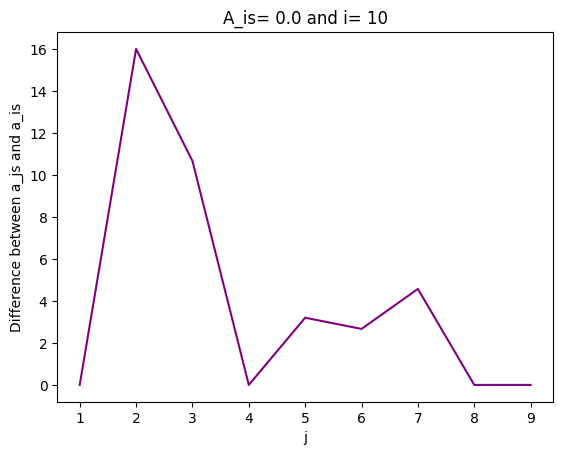

A_is:  1.12


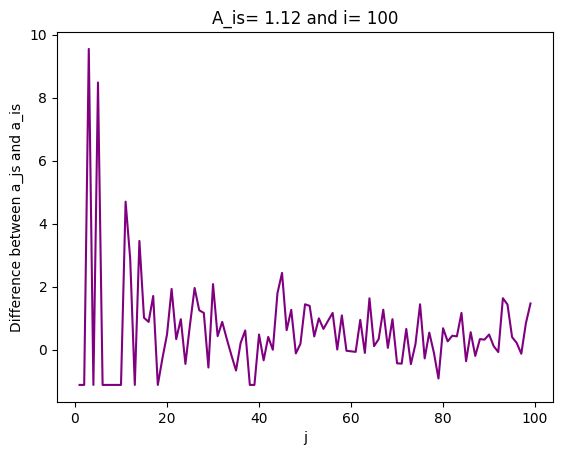

A_is:  1.6


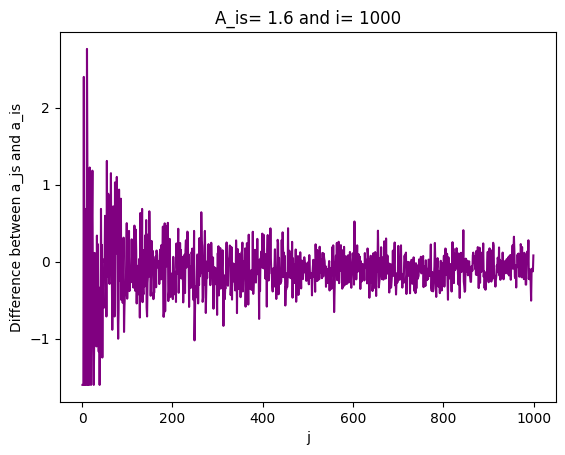

In [19]:
timeout = 0.09 + time.time()
power = 1

while True:
    timeout_start = time.time()
    i, s = 10**power, 10**power
    a_is = est_area(i, s)
    print("A_is: ", a_is)
    j_list = []
    diff_list = []
    for j in range(1, 10**power):
        a_js = est_area(j, s) 
        j_list.append(j)
        diff_list.append(a_js - a_is)
    plt.plot(j_list, diff_list, color = "purple")
    plt.xlabel("j")
    plt.ylabel("Difference between a_js and a_is")
    plt.title(f"A_is= {a_is} and i= {i}")
    plt.show()
    if timeout_start > timeout:
        break
    power += 1

In [20]:
timeout = 0.5 + time.time()
power = 1

while True:
    timeout_start = time.time()
    i, s = 10**power, 10**power
    area = est_area(i, s) 
    if timeout_start > timeout:
        break
    power += 1
    print(f'Estimated area with s={s} and i={i}', area)

Estimated area with s=10 and i=10 0.0
Estimated area with s=100 and i=100 2.24
Estimated area with s=1000 and i=1000 1.504
Estimated area with s=10000 and i=10000 1.4608


In [32]:
from smt.sampling_methods import LHS

def est_area_LHS(num_points, max_iter):
    p_inside = 0
    p_outside = 0
    xlimits = np.array([[-2, 2]])   
    
    sampling_real = LHS(xlimits=xlimits)
    sampling_im = LHS(xlimits=xlimits)
    s_real = sampling_real(num_points)
    s_im = sampling_im(num_points)
    # put the points in a list
    s_real_list = [i for [i] in s_real]
    s_im_list = [i for [i] in s_im]
    c_list = [complex(s_real, s_im) for s_real, s_im in zip(s_real_list, s_im_list)]
    for c in c_list:
        if in_mandelbrot(c, max_iter) == max_iter:
            p_inside += 1
        else:
            p_outside += 1
    
    est_area = (p_inside/num_points)*16
    return est_area

timeout = 0.5 + time.time()
power = 1
while True:
    timeout_start = time.time()
    i, s = 10**power, 10**power
    area = est_area_LHS(i, s) 
    if timeout_start > timeout:
        break
    power += 1
    print(f'Estimated area with s={s} and i={i}:', area)


Estimated area with s=10 and i=10 1.6
Estimated area with s=100 and i=100 0.96
Estimated area with s=1000 and i=1000 1.552
Estimated area with s=10000 and i=10000 1.5344


In [57]:
def est_area_orthogonal(num_points, max_iter):
    p_inside = 0
    p_outside = 0
    xlimits_list =[]
    x1, x2 = -2, -1.5
   
    while x2 <= 2:
        y1, y2 = -2, -1.5
        while y2 <= 2:
            xlimits = np.array([[x1, x2], [y1, y2]])
            xlimits_list.append(xlimits)
            y1 += 0.5
            y2 += 0.5
            
        x1 += 0.5
        x2 += 0.5
    
    for xlimits in xlimits_list:
        
        sampling = LHS(xlimits=xlimits)
        
        num = int(num_points/len(xlimits_list))
        s = sampling(num)
        
        s_real_list = [i[0] for i in s]
        s_im_list = [i[1] for i in s]
        c_list = [complex(s_real, s_im) for s_real, s_im in zip(s_real_list, s_im_list)]
        
        for c in c_list:
            if in_mandelbrot(c, max_iter) == max_iter:
                p_inside += 1
            else:
                p_outside += 1
    est_area = (p_inside/num_points)*16
    return est_area

timeout = 0.1 + time.time()
power = 1
while True:
    timeout_start = time.time()
    # the power of 8 is used since the total number of points needs to be divisible by 64 (the number of subspaces)
    i, s = 8**power, 8**power
    area = est_area_orthogonal(i, s) 
    if timeout_start > timeout:
        break
    power += 1
    print(f'Estimated area with s={s} and i={i}:', area)


Estimated area with s=8 and i=8: 0.0
Estimated area with s=64 and i=64: 1.0
Estimated area with s=512 and i=512: 1.46875
Estimated area with s=4096 and i=4096: 1.53515625
